In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import math
from scipy.optimize import minimize_scalar,minimize

In [3]:
class Yeoh:
    def __init__(self,P,A,B,C):
        self.P = P
        self.A = A
        self.B = B
        self.C = C
        self.bnds2d = ((1, 10), (1,None))
        self.bnds3d = ((1, 10), (1,None),(1,None))
    
    def objective_3d(self,params):
        x,y,z=params
        I1 = x**2+y**2+z**2
        return (self.A/2)*(I1-3) + (self.B/2)*(I1-3)**2 + (self.C/2)*(I1-3)**3 - (self.P)*(x) # For 1-D testing

    def objective_2d(self,params):
        x,y=params
        z = (1/x*y)
        I1 = x**2+y**2+z**2
        return (self.A/2)*(I1-3) + (self.B/2)*(I1-3)**2 + (self.C/2)*(I1-3)**3 - (self.P)*(x) # For 1-D testing

    def return_min(self,start):
        if(len(start)==3):
            res = minimize(self.objective_3d,x0=start,bounds=self.bnds3d)
            return res
        else:
            res = minimize(self.objective_2d,x0=start,bounds = self.bnds2d)
            return res 
    
    def calc_energy(self,params):
        if(len(params)==3):
            x1,x2,x3 = params
            I1 = x1**2+x2**2+x3**2
            return (self.A/2)*(I1-3)+(self.B/2)*(I1-3)**2 + (self.C/2)*(I1-3)**3
        else:
            x1,x2=params
            x3 = 1/(x1*x2)
            I1 = x1**2+x2**2+x3**2
            return (self.A/2)*(I1-3)+(self.B/2)*(I1-3)**2 + (self.C/2)*(I1-3)**3

In [37]:
class Plotter_Yeoh:
    def __init__(self,index,soln,energy):
        self.index = index
        self.soln = soln
        self.energy = energy
        self.solnx = []
        self.solny = []
        for i in soln[self.index]:
            self.solnx.append(i[0])
            self.solny.append(i[1])

    def force_stretch(self):
        plt.plot(self.solnx,P,'r+')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Stress',fontname='Times New Roman')
        plt.title("Stress vs Stretch parameter")
        plt.show()

    def energy_stretch(self):
        lamdax = []
        lamday = []
        lamdaz = []

        for i in self.soln[self.index]:
            lamdax.append([i[0]])
            lamday.append(i[1])
            if(len(self.soln[self.index])==3):
                lamdaz.append(i[2])
            else:
                lamdaz.append(1/(i[0]*i[1]))
        plt.plot(lamdax,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter x',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter x")
        plt.show()

        plt.plot(lamday,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter y',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter y")
        plt.show()

        plt.plot(lamdaz,self.energy[self.index],'bo')
        plt.xlabel('Stretch parameter z',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title("Energy vs Stretch parameter z")
        plt.show()
    
    def calc_energy(self,params):
        if(len(params)==3):
            x1,x2,x3 = params
            I1 = x1**2+x2**2+x3**2
            return (A[self.index]/2)*(I1-3) + (B[self.index]/2)*(I1-3)**2 + (C[self.index]/2)*(I1-3)**3 - P[450]*x1
        else:
            x1,x2=params
            x3 = 1/(x1*x2)
            I1 = x1**2+x2**2+x3**2
            return (A[self.index]/2)*(I1-3) + (B[self.index]/2)*(I1-3)**2 + (C[self.index]/2)*(I1-3)**3 - P[450]*x1
    
    def check_min_lamda_2d(self):
        lamdax = np.linspace(2,3,500)
        lamdax1 = np.linspace(1,10,500)
        lamday = np.ones(500)
        lamdas = []
        lamdas1 = []
        for i in range(500):
            lamdas.append([lamdax[i],lamday[i]])
            lamdas1.append([lamdax1[i],lamday[i]])
        energy_calc = [self.calc_energy(lamdas[i]) for i in range(500)]
        energy_calc1 = [self.calc_energy(lamdas1[i]) for i in range(500)]
        plt.plot(lamdax,energy_calc)
        plt.axvline(x = self.solnx[450], color = 'purple', label = 'axvline - full height')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title(f'Plot Showing lamda = {np.round(self.solnx[450],2)} is minimum energy for stress = {np.round(P[450],2)}')
        plt.show()
        plt.plot(lamdax1,energy_calc1)
        plt.axvline(x = self.solnx[450], color = 'purple', label = 'axvline - full height')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title(f'Plot Showing lamda = {np.round(self.solnx[450],2)} is minimum energy for stress = {np.round(P[450],2)}')
        plt.show()

    def check_min_lamda_3d(self):
        lamdax = np.linspace(2,3,500)
        lamdax1 = np.linspace(1,10,500)
        lamday = np.ones(500)
        lamdaz = np.ones(500)
        lamdas = []
        lamdas1 =[]
        for i in range(500):
            lamdas.append([lamdax[i],lamday[i],lamdaz[i]])
            lamdas1.append([lamdax1[i],lamday[i],lamdaz[i]])

        energy = [self.calc_energy(lamdas[i]) for i in range(500)]
        energy1 = [self.calc_energy(lamdas1[i]) for i in range(500)]
        plt.plot(lamdax,energy)
        plt.axvline(x = self.solnx[450], color = 'purple', label = 'axvline - full height')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title(f'Plot Showing lamda = {np.round(self.solnx[450],2)} is minimum energy for stress = {np.round(P[450],2)}')
        plt.show()
        plt.plot(lamdax1,energy1)
        plt.axvline(x = self.solnx[450], color = 'purple', label = 'axvline - full height')
        plt.xlabel('Stretch parameter',fontname='Times New Roman')
        plt.ylabel('Energy',fontname='Times New Roman')
        plt.title(f'Plot Showing lamda = {np.round(self.solnx[450],2)} is minimum energy for stress = {np.round(P[450],2)}')
        plt.show()

In [5]:
A = np.logspace(-1,2,500)
B = np.logspace(1,3,500)
C = np.logspace(-2,2,500)
P = np.linspace(500,1500,1000)

In [6]:
soln_2d = []
energy_2d = []
for k in range(500):
    temp_soln = []
    temp_energy =[]
    for i in range(len(P)):
        a = Yeoh(P[i],A[k],B[k],C[k])
        res = a.return_min([1.,1.])
        temp_soln.append(res['x'])
        energy_node = a.calc_energy(res['x'])
        temp_energy.append(energy_node)
        
    soln_2d.append(temp_soln)
    energy_2d.append(temp_energy)

In [7]:
soln_3d = []
energy_3d = []
for k in range(500):
    temp_soln = []
    temp_energy =[]
    for i in range(len(P)):
        a = Yeoh(P[i],A[k],B[k],C[k])
        res = a.return_min([1.,1.,1.])
        temp_soln.append(res['x'])
        energy_node = a.calc_energy(res['x'])
        temp_energy.append(energy_node)
        
    soln_3d.append(temp_soln)
    energy_3d.append(temp_energy)

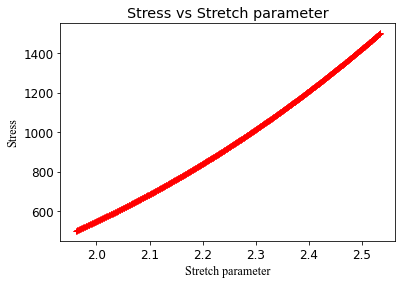

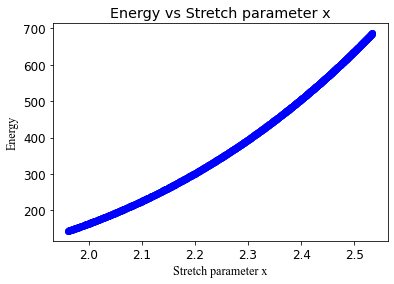

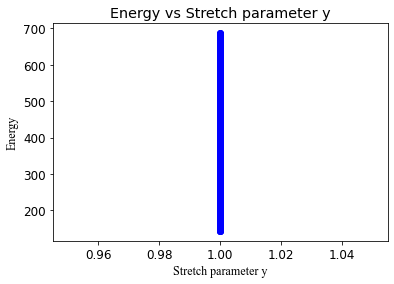

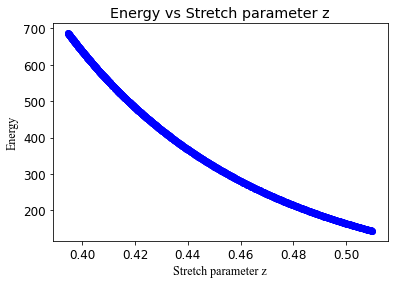

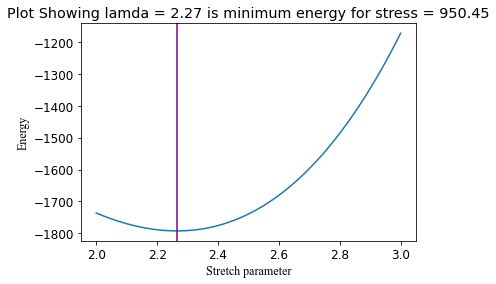

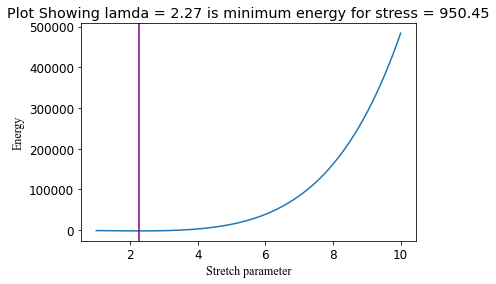

In [38]:
a = Plotter_Yeoh(200,soln_2d,energy_2d)
a.force_stretch()
a.energy_stretch()
a.check_min_lamda_2d()

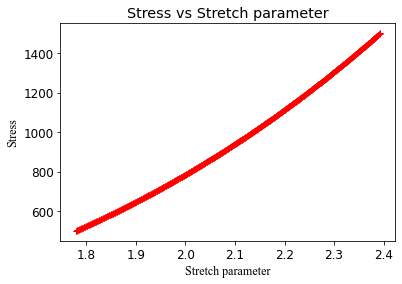

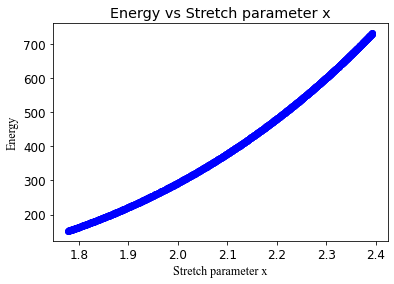

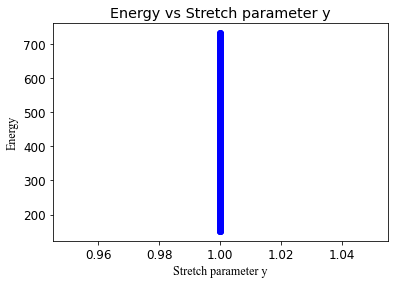

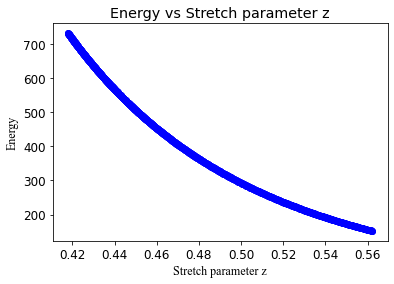

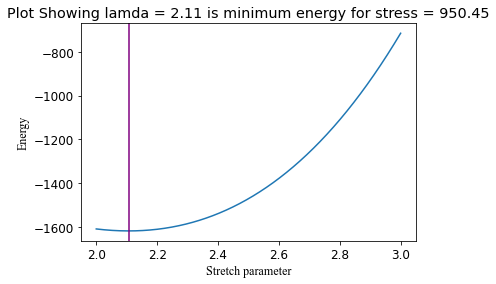

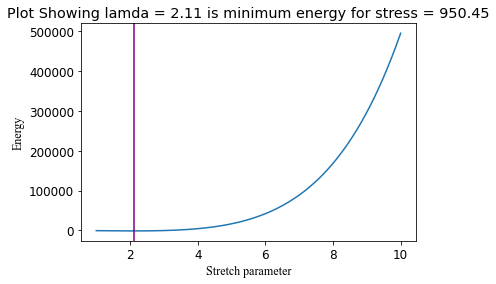

In [39]:
b = Plotter_Yeoh(200,soln_3d,energy_3d)
b.force_stretch()
b.energy_stretch()
b.check_min_lamda_3d()

In [10]:
def calc_energy(params):
    if(len(params)==2):
        x1,x2 = params
        x3 = 1/(x1*x2)
        I1 = x1**2+x2**2+x3**2
        return [(I1-3),(I1-3)**2,(I1-3)**3]
    else:
        x1,x2,x3 = params
        I1 = x1**2+x2**2+x3**2
        return [(I1-3),(I1-3)**2,(I1-3)**3]

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [12]:
data = np.array([[calc_energy(x) for x in temp] for temp in soln_2d])

In [13]:
num_samples,nx,ny = data.shape

In [14]:
dataset = data.reshape(num_samples,nx*ny)

In [15]:
Y = []
X = dataset
for i in range(500):
    Y.append([A[i],B[i],C[i]])


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [17]:
print(np.array(X_train).shape)

(375, 3000)


In [18]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

2.067884682564303

In [20]:
model.predict(np.array(X_test[100]).reshape(1,3000))

array([[ 0.49741245, 29.13678374,  0.08492342]])

In [21]:
print(y_test[100])

[0.4913407286296363, 28.901597179095102, 0.08353023195026779]


In [22]:
data_3d = np.array([[calc_energy(x) for x in temp] for temp in soln_3d])

In [23]:
num_samples,nx,ny = data_3d.shape

In [24]:
dataset_3d = data_3d.reshape(num_samples,nx*ny)

In [25]:
Y = []
X = dataset_3d
for i in range(500):
    Y.append([A[i],B[i],C[i]])

In [26]:
X_train_3d,X_test_3d,y_train_3d,y_test_3d = train_test_split(X,Y,test_size=0.25)

In [27]:
model = RandomForestRegressor()
model.fit(X_train_3d,y_train_3d)

RandomForestRegressor()

In [28]:
predictions_3d = model.predict(X_test_3d)
mean_squared_error(y_test_3d, predictions_3d)

2.1364587013885115

In [29]:
model.predict(np.array(X_test_3d[100]).reshape(1,3000))

array([[ 0.27463575, 19.61063   ,  0.03846233]])

In [30]:
print(y_test_3d[100])

[0.27093538657320515, 19.434669265360203, 0.03777063694539366]
